## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = 'C:/Users/user/Desktop/ML marathon/data/Home Credit Default Risk/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/user/Desktop/ML marathon/data/Home Credit Default Risk/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


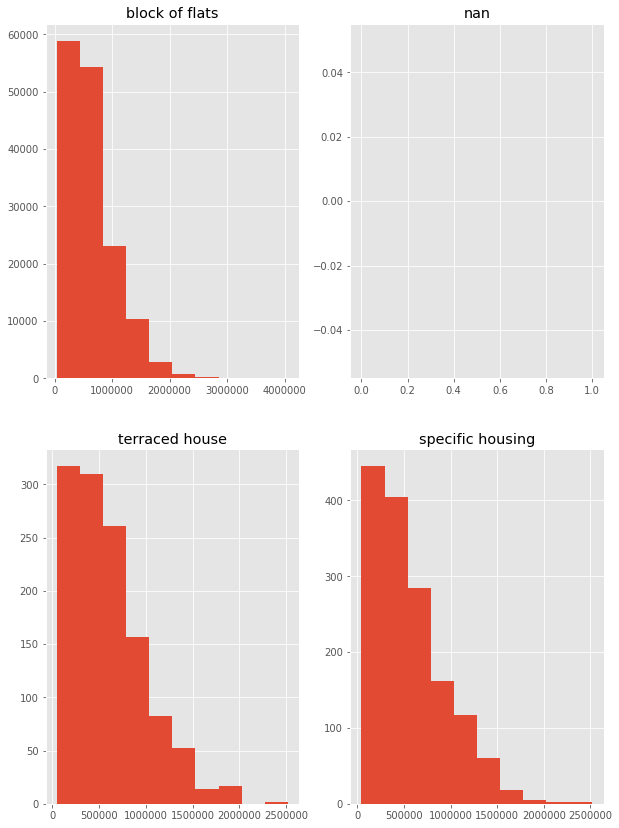

In [8]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版

unique_house_type = app_train['HOUSETYPE_MODE'].unique()

nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1) # 第幾張子圖
    
    app_train.loc[app_train['HOUSETYPE_MODE'] == unique_house_type[i], 'AMT_CREDIT'].hist()
    
    plt.title(str(unique_house_type[i]))
plt.show()    

#### nan 的畫不出來，但還是想辦法弄一下

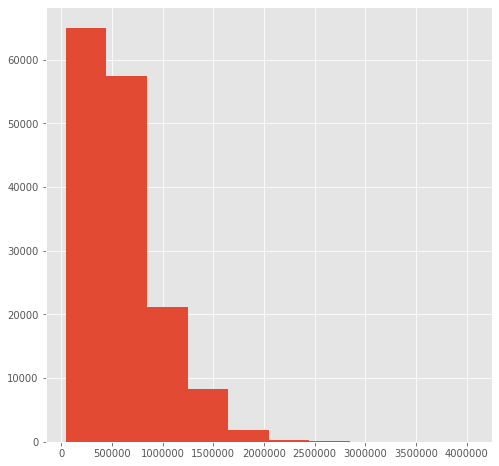

In [26]:
plt.figure(figsize = (8, 8))
app_train.loc[app_train['HOUSETYPE_MODE'].isnull(), 'AMT_CREDIT'].hist()
plt.show()

#### 雖然不太知道這一欄位代表的意義，但是大概可以看出AMT_CREDIT對上三種類型有相似的分布

### 根據不同的 HOUSETYPE_MODE 繪製 AMT_CREDIT 對 TARGET 的 KDE plot
> 發現這樣做好像看不太出來什麼結果

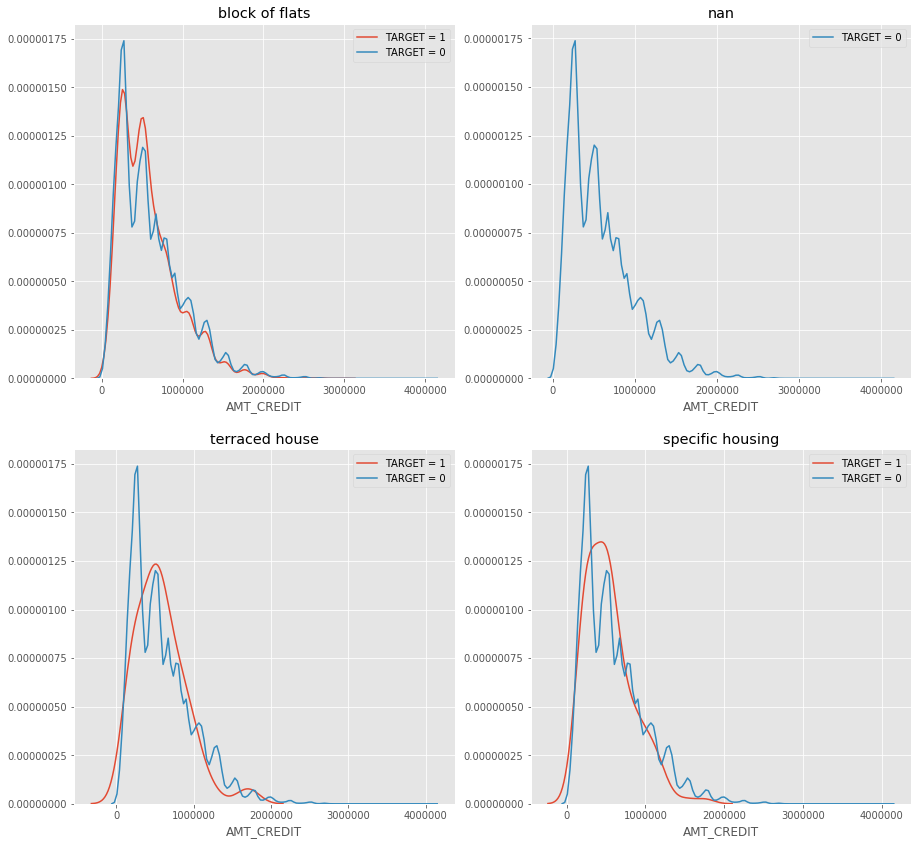

In [32]:
unique_house_type = app_train['HOUSETYPE_MODE'].unique()

nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(15,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1) # 第幾張子圖
    
    sns.distplot(app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & \
                               (app_train['TARGET'] == 1), 'AMT_CREDIT'],
                label = "TARGET = 1", hist = False)
    
    
    sns.distplot(app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & \
                               (app_train['TARGET']) == 0, 'AMT_CREDIT'],
                label = "TARGET = 0", hist = False)
    
    plt.title(str(unique_house_type[i]))

plt.show()    

### 換做將 ANT_CREDIT 分組對做 KDE plot，觀察 TARGET 的分布
> 可以發現貸款信用額度超過一定金額的人基本上不會借錢不還（好像是廢話？）

In [38]:
credit = app_train[['TARGET', 'AMT_CREDIT']]
credit['EQUAL_WIDTH_CREDIT'] = pd.cut(credit['AMT_CREDIT'], 10)
credit['EQUAL_WIDTH_CREDIT'].value_counts()

(40995.0, 445500.0]       125109
(445500.0, 846000.0]      112729
(846000.0, 1246500.0]      44613
(1246500.0, 1647000.0]     18768
(1647000.0, 2047500.0]      4847
(2047500.0, 2448000.0]      1030
(2448000.0, 2848500.0]       372
(2848500.0, 3249000.0]        23
(3649500.0, 4050000.0]        12
(3249000.0, 3649500.0]         8
Name: EQUAL_WIDTH_CREDIT, dtype: int64

In [73]:
credit['TARGET'].value_counts() # 看看到底有多少人借錢不還

0    282686
1     24825
Name: TARGET, dtype: int64

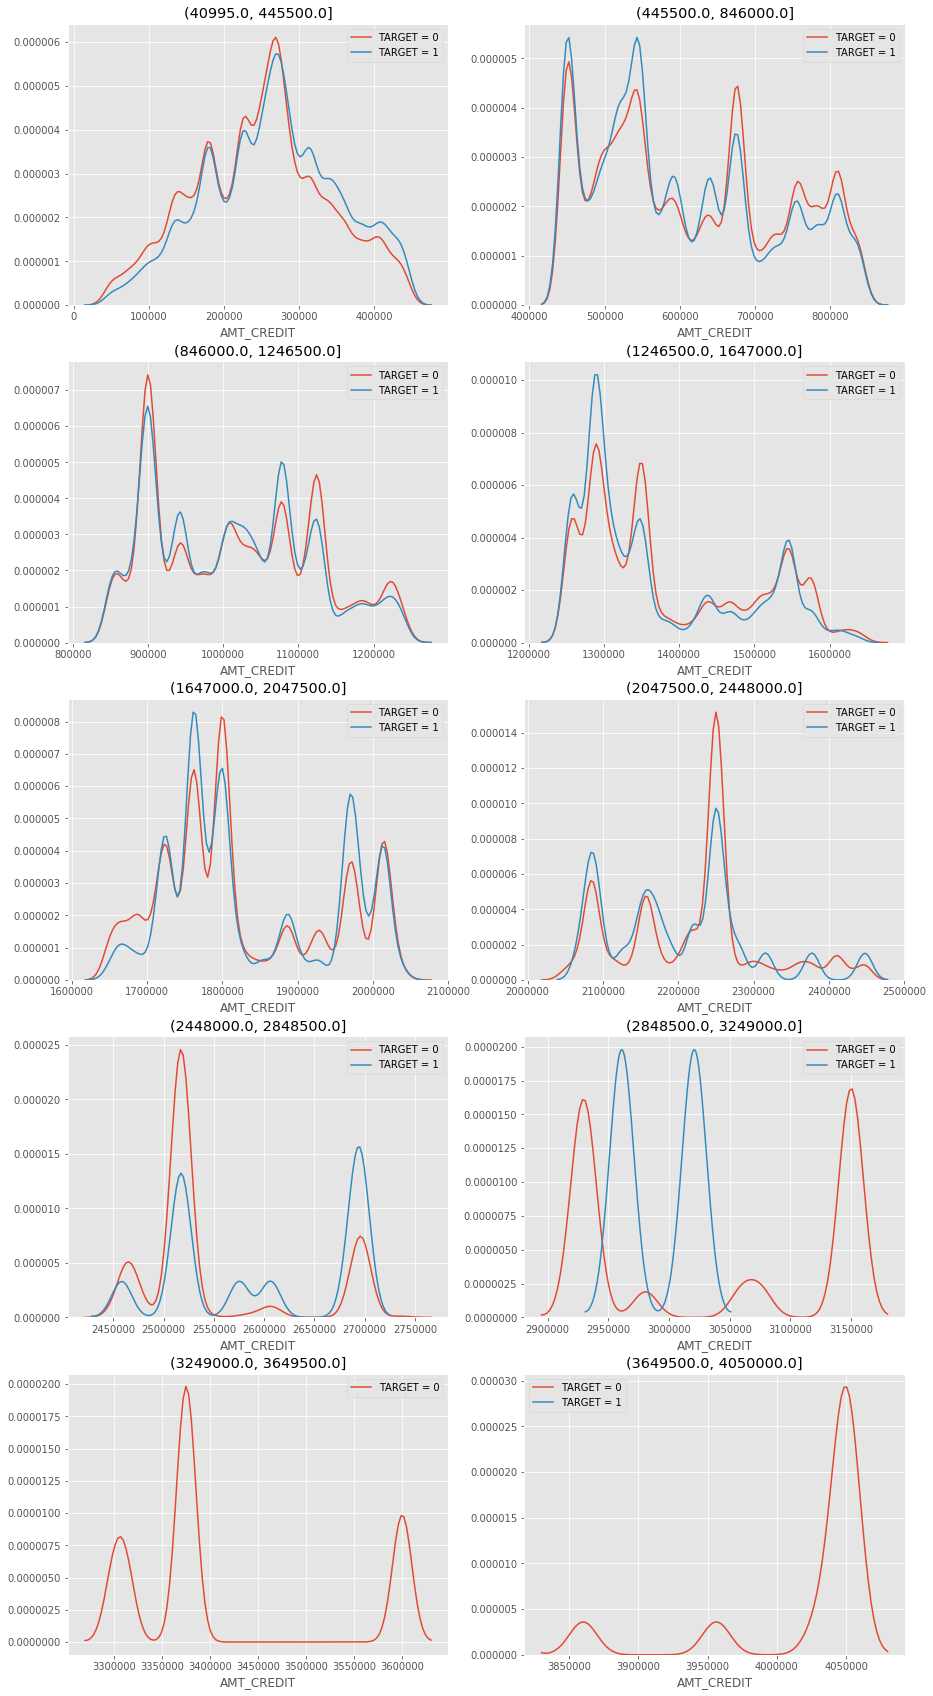

In [77]:
credit_groups = np.sort(credit['EQUAL_WIDTH_CREDIT'].unique())

nrow = 5
ncol = 2

plt.figure(figsize = (15, 30))
for i in range(len(credit_groups)):
    plt.subplot(nrow, ncol, i + 1)
    
    sns.distplot(credit.loc[(credit['EQUAL_WIDTH_CREDIT'] == credit_groups[i]) & (credit['TARGET'] == 0), 'AMT_CREDIT'],
                 label = 'TARGET = 0', hist = False, kde_kws = {'bw':10000})
    sns.distplot(credit.loc[(credit['EQUAL_WIDTH_CREDIT'] == credit_groups[i]) & (credit['TARGET'] == 1), 'AMT_CREDIT'],
                 label = 'TARGET = 1', hist = False, kde_kws = {'bw':10000})
    plt.title(str(credit_groups[i]))